In [2]:
import warnings                                      # 경고 메시지를 출력하고 싶지 않을 경우 
warnings.filterwarnings('ignore')                # 경고 메시지를 출력하지 않는다. 경고 메시지를 보고싶다면 default로 지정한다
from IPython.display import Image            # 쥬피터 노트북에 이미지를 출력하기 위해 
import numpy as np                                # 배열(수치) 계산을 위해
import pandas as pd                                # 데이터 분석을 위해
import matplotlib.pyplot as plt                  # 데이터 시각화를 위해
plt.rcParams['font.family'] = 'NanumGothic' # matplotlib에서 사용할 한글 글꼴을 지정한다
plt.rcParams['font.size'] = 15                      # matplotlib에서 사용할 글꼴 크기를 지정한다
import matplotlib as mpl                          # matplotlib에서 음수 데이터의 '-'글꼴이 개지는 것을 방지하기 위해
mpl.rcParams['axes.unicode_minus'] =False  # matplotlib에서 음수 데이터의 '-' 글꼴이 깨지지 않게 한다
import seaborn as sns                              # matplotlib를 기반으로한 데이터 시각화 도구
from plotnine import *                             # R의 ggplot2 패키지를 사용하는 것처럼 시각화 하는 도구
import missingno as msno                        # NaN 분포를 그래프 형태로 시각화 하는 도구
import folium                                         # 지도 시각화 도구

서울시 공무원 업무 추진비를 분석한 공무원 맛집 찾기
서울시는 업무 추진에 대한 비용 집행의 투명성을 제공하고자 공개된 시장단을 비롯해 4급 부서장 이상의 간부직 공무원의 업무 추진비 집행 내역을 공개한다
서울시 업무 추진비 ur1 => https://opengov.seoul.go.kr/expense

In [3]:
# read_csv() 함수에 index_col 옵션을 사용하면 인덱스도 열 이름을 붙일 수 있다
df = pd.read_csv('./data/raw.csv', index_col='연번')
df.shape

(51456, 9)

In [4]:
df.head()

,1소속부서,결제방법,구분,대상인원,부서명,집행금액,집행목적,집행일시,집행장소
연번,,,,,,,,,
1,서울특별시장,카드,시정 관련 간담회 등,시장 등 12명,행정국 총무과,344000.0,시정 정책추진 자문 간담회,2018-01-19 20:41,동신참치양재직(서초구 강남대로 213)
2,서울특별시장,카드,시정 관련 간담회 등,"시장, 청년단체 등 38명",행정국 총무과,450000.0,시정 청년 정책 의견수렴 간담회,2018-01-23 19:06,서울시청구내식당 ( 중구 세종대로 110)
3,서울특별시장,카드,시정 관련 간담회 등,시장 등 8명,행정국 총무과,226000.0,시정 주요 경제정책 현안추진 의견수렴 간담회,2018-01-29 20:13,한뫼촌(종로구 북촌로)
4,서울특별시장,카드,시정 관련 간담회 등,시장 등 11명,행정국 총무과,324500.0,시정종교계 의견수렴 간담회,2018-01-12 09:09,서울시청구내식당(중구 세종대로 110)
5,서울특별시장,카드,시정 관련 간담회 등,시장 등 25명,행정국 총무과,737500.0,시정 정책 추진 의견수렴 간담회,2018-01-12 09:10,서울시청구내식당(중구 세종대로 110)


In [5]:
df.tail()

,1소속부서,결제방법,구분,대상인원,부서명,집행금액,집행목적,집행일시,집행장소
연번,,,,,,,,,
39,시민건강국,카드,NaN,보건의료정책 직원 4명,시민건강국 보건의료정책과,110000.0,보건의료정책과 2016년 종무식 추진관련 직원격려물품 구입비 지급,2016-12-29 13:23,올리브네트웍스 (중구 세종대로 16길)
40,시민건강국,카드,NaN,시민건강국장 외 7명,시민건강국 보건의료정책과,118000.0,2017년 신년업무보고 계획 논의 간담회비 지급,2016-12-29 21:19,남도한식고운님 (중구 세종대로 82)
41,시민건강국,카드,NaN,시민건강국장 외 6명,시민건강국 보건의료정책과,174000.0,시민건강국 간부 송년 오찬간담회비 지급,2016-12-30 13:04,춘산에프앤비 (중구 태평로1가 84)
42,시민건강국,카드,NaN,보건의료정책과 직원,시민건강국 보건의료정책과,30000.0,보건의료정책과 2016년 종무식 추진관련 직원격려물품 구입비 지급,2016-12-30 13:13,스타벅스 (중구 을지로 19)
43,시민건강국,카드,NaN,보건의료정책과 직원,시민건강국 보건의료정책과,40000.0,보건의료정책과 2016년 종무식 추진관련 직원격려물품 구입비 지급,2016-12-30 13:04,스타벅스 (중구 을지로 19)


In [6]:
df.dtypes

1소속부서     object
결제방법      object
구분        object
대상인원      object
부서명       object
집행금액     float64
집행목적      object
집행일시      object
집행장소      object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51456 entries, 1 to 43
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1소속부서   51456 non-null  object 
 1   결제방법    51279 non-null  object 
 2   구분      1479 non-null   object 
 3   대상인원    51448 non-null  object 
 4   부서명     51454 non-null  object 
 5   집행금액    51455 non-null  float64
 6   집행목적    51440 non-null  object 
 7   집행일시    51455 non-null  object 
 8   집행장소    51421 non-null  object 
dtypes: float64(1), object(8)
memory usage: 3.9+ MB


<AxesSubplot:>

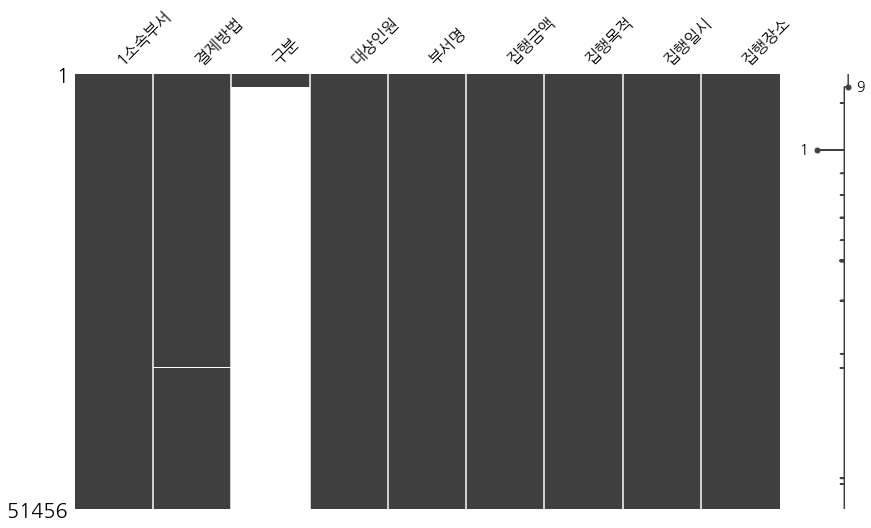

In [8]:
msno.matrix(df, figsize=(14, 8))

In [9]:
df.isnull().sum()

1소속부서        0
결제방법       177
구분       49977
대상인원         8
부서명          2
집행금액         1
집행목적        16
집행일시         1
집행장소        35
dtype: int64

In [10]:
# 집행금액에 NaN 데이터가 있다 확인해보자
df[df['집행금액'].isnull()]

,1소속부서,결제방법,구분,대상인원,부서명,집행금액,집행목적,집행일시,집행장소
연번,,,,,,,,,
해당년월 해당과에 등록된 업무추진비가 없습니다. 2016년 10월 이전의 업무추진비는 상세집행내역을 이용하세요.,서울혁신기획관,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
missing_df_row = df[df['집행금액'].isnull()].index[0]
missing_df_row

'해당년월 해당과에 등록된 업무추진비가 없습니다. 2016년 10월 이전의 업무추진비는 상세집행내역을 이용하세요.'

In [12]:
# 해당 열을 제거하고 다시 df 데이터프레임에 저장한다
print(df.shape)
df = df.drop(missing_df_row)
print(df.shape)

(51456, 9)
(51455, 9)


In [13]:
# 집행일시 열을 이용해서 '연', '월', '연월', '일', '시', '분', '요일' 파생 변수를 만든다
# 판다스에서 to_datetime() 함수를 사용해서 문자열 형태의 데이터를 날짜/시간 형태의 데이터로 변환할 수 있다
df['집행일시'] = pd.to_datetime(df['집행일시'])
df.dtypes

1소속부서            object
결제방법             object
구분               object
대상인원             object
부서명              object
집행금액            float64
집행목적             object
집행일시     datetime64[ns]
집행장소             object
dtype: object

In [14]:
df['연'] = df['집행일시'].dt.year.astype(np.int)
df['월'] = df['집행일시'].dt.month.astype(np.int)
df['연월'] = df['연'].astype(str) + '-' + df['월'].astype(str)
df['일'] = df['집행일시'].dt.day.astype(np.int)
df['시'] = df['집행일시'].dt.hour.astype(np.int)
df['분'] = df['집행일시'].dt.minute.astype(np.int)
df['요일'] = df['집행일시'].dt.dayofweek.astype(np.int) # 0 => 월, 1 => 화, 2 => 수, 3 => 목, 4 => 금, 5 => 토, 6 => 일
df.dtypes

1소속부서            object
결제방법             object
구분               object
대상인원             object
부서명              object
집행금액            float64
집행목적             object
집행일시     datetime64[ns]
집행장소             object
연                 int32
월                 int32
연월               object
일                 int32
시                 int32
분                 int32
요일                int32
dtype: object

In [15]:
df.head()

,1소속부서,결제방법,구분,대상인원,부서명,집행금액,집행목적,집행일시,집행장소,연,월,연월,일,시,분,요일
연번,,,,,,,,,,,,,,,,
1,서울특별시장,카드,시정 관련 간담회 등,시장 등 12명,행정국 총무과,344000.0,시정 정책추진 자문 간담회,2018-01-19 20:41:00,동신참치양재직(서초구 강남대로 213),2018,1,2018-1,19,20,41,4
2,서울특별시장,카드,시정 관련 간담회 등,"시장, 청년단체 등 38명",행정국 총무과,450000.0,시정 청년 정책 의견수렴 간담회,2018-01-23 19:06:00,서울시청구내식당 ( 중구 세종대로 110),2018,1,2018-1,23,19,6,1
3,서울특별시장,카드,시정 관련 간담회 등,시장 등 8명,행정국 총무과,226000.0,시정 주요 경제정책 현안추진 의견수렴 간담회,2018-01-29 20:13:00,한뫼촌(종로구 북촌로),2018,1,2018-1,29,20,13,0
4,서울특별시장,카드,시정 관련 간담회 등,시장 등 11명,행정국 총무과,324500.0,시정종교계 의견수렴 간담회,2018-01-12 09:09:00,서울시청구내식당(중구 세종대로 110),2018,1,2018-1,12,9,9,4
5,서울특별시장,카드,시정 관련 간담회 등,시장 등 25명,행정국 총무과,737500.0,시정 정책 추진 의견수렴 간담회,2018-01-12 09:10:00,서울시청구내식당(중구 세종대로 110),2018,1,2018-1,12,9,10,4


<AxesSubplot:xlabel='연', ylabel='count'>

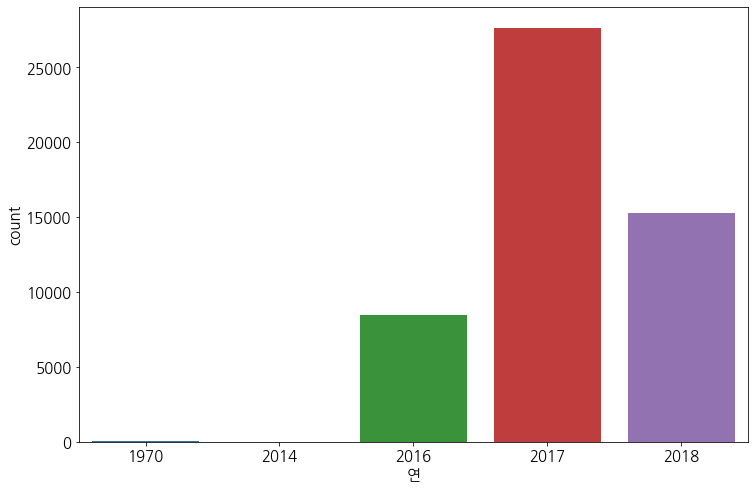

In [16]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rc('font', size=15)
sns.countplot(data=df, x='연')

<AxesSubplot:xlabel='월', ylabel='count'>

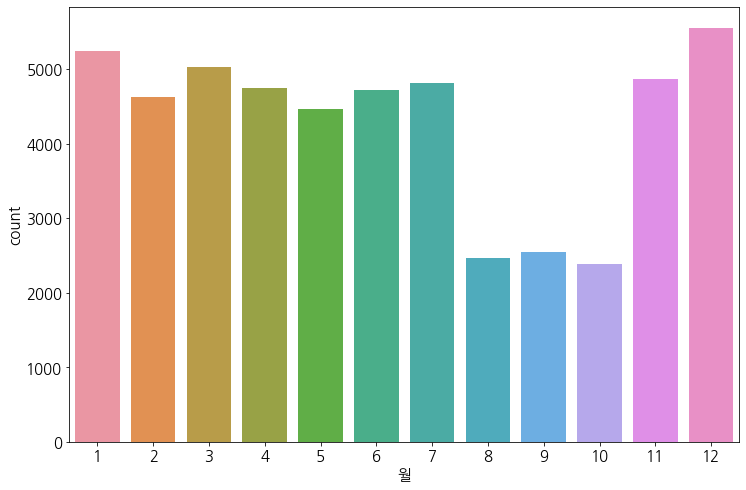

In [17]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rc('font', size=15)
sns.countplot(data=df, x='월')

<AxesSubplot:xlabel='연월', ylabel='count'>

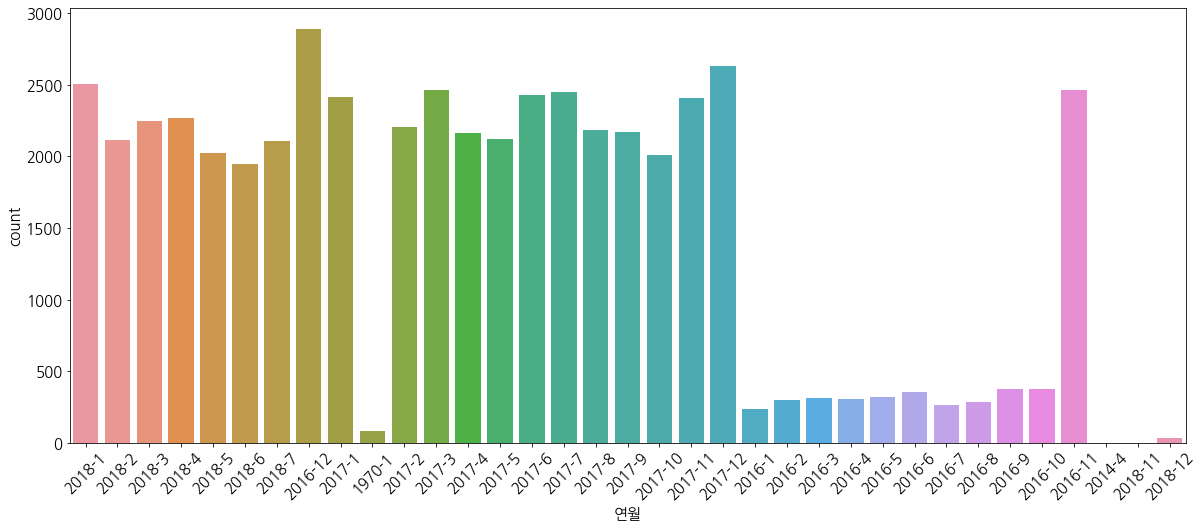

In [18]:
plt.rcParams['figure.figsize'] = [20, 8]
plt.rc('font', size=15)
plt.xticks(rotation=45)
sns.countplot(data=df, x='연월')

In [19]:
# 그래프에서 '연월' 순으로 보기 위해서 '연', '월'의 오름차순으로 정렬한다
df = df.sort_values(by=['연', '월'], ascending=False)

<AxesSubplot:xlabel='연월', ylabel='count'>

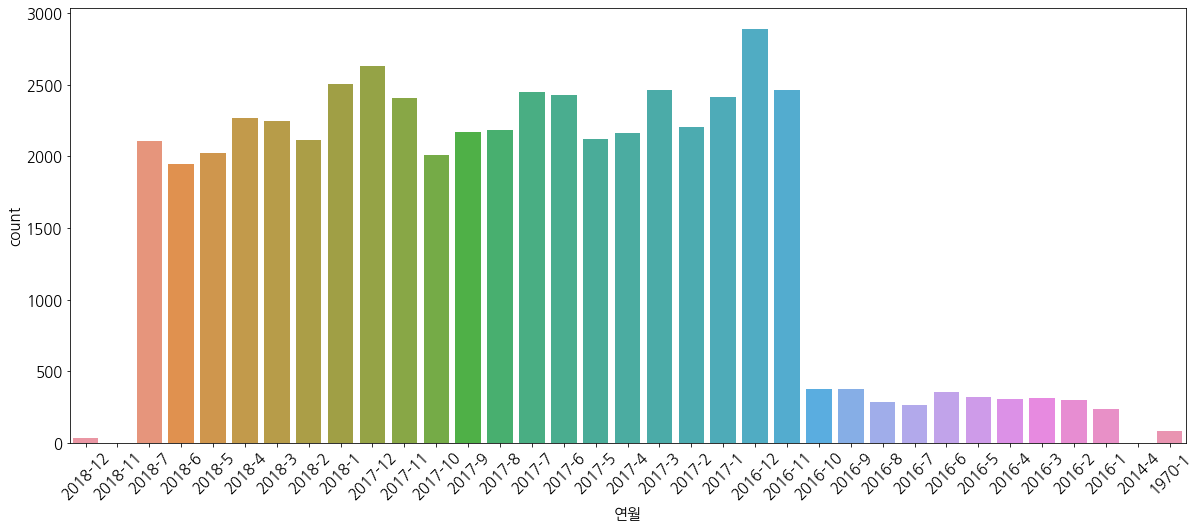

In [20]:
plt.rcParams['figure.figsize'] = [20, 8]
plt.rc('font', size=15)
plt.xticks(rotation=45)
sns.countplot(data=df, x='연월')

<AxesSubplot:xlabel='시', ylabel='count'>

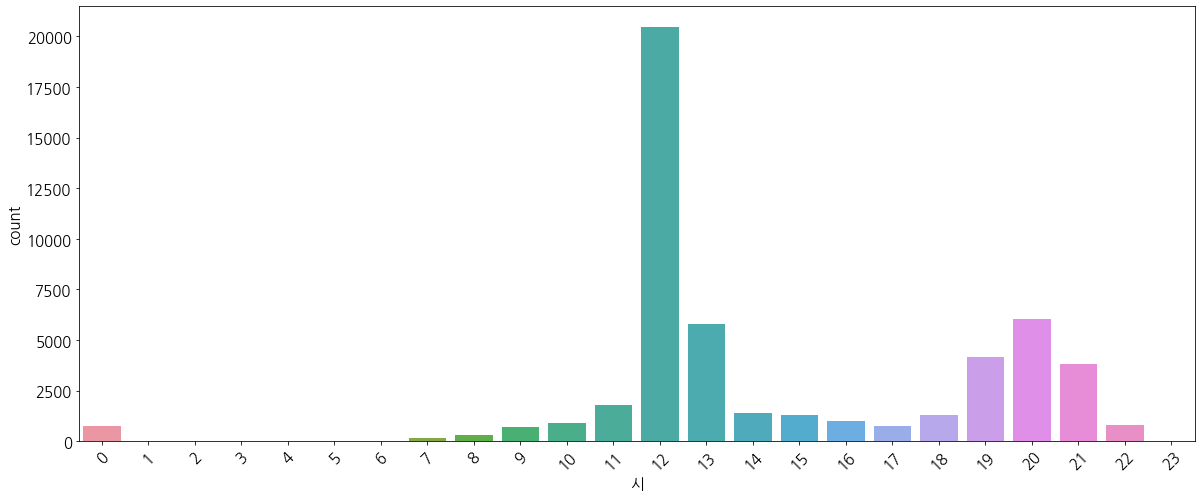

In [21]:
plt.rcParams['figure.figsize'] = [20, 8]
plt.rc('font', size=15)
plt.xticks(rotation=45)
sns.countplot(data=df, x='시')

<AxesSubplot:xlabel='요일', ylabel='count'>

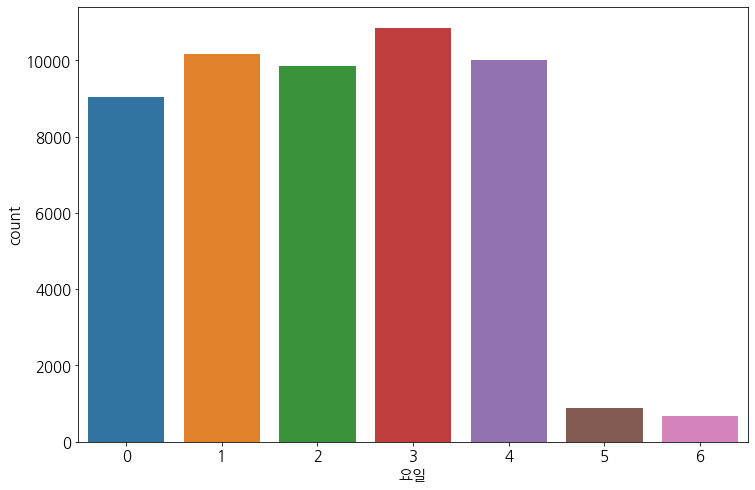

In [22]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rc('font', size=15)
sns.countplot(data=df, x='요일')

In [23]:
# 0 => 월, 1 => 화, 2 => 수, 3 => 목, 4 => 금, 5 => 토, 6 => 일
weekday_map = { 0: '월', 1: '화', 2: '수', 3: '목', 4: '금', 5: '토', 6: '일'}
df['요일_한글'] = df['요일'].apply(lambda x: weekday_map[x])
df

,1소속부서,결제방법,구분,대상인원,부서명,집행금액,집행목적,집행일시,집행장소,연,월,연월,일,시,분,요일,요일_한글
연번,,,,,,,,,,,,,,,,,
1,시민건강국,카드,NaN,보건의료정책과장 등 8명,보건의료정책과,137600.0,겨울철 응급의료상황대비 업무추진관련 간담회비 지급,2018-12-01 12:27:00,FC외식(중구 태평로1가),2018,12,2018-12,1,12,27,5,토
2,시민건강국,카드,NaN,시민건강국장 등 3명,보건의료정책과,55000.0,시민건강국 현안업무 추진직원 격려 간담회비 지급,2018-12-04 20:23:00,대가일식(중구 서소문로101),2018,12,2018-12,4,20,23,1,화
3,시민건강국,카드,NaN,보건의료정책과장 등 6명,보건의료정책과,84000.0,시립병원장 회의추진관련 유관부서 간담회비 지급,2018-12-04 12:45:00,한가람(중구 을지로1가),2018,12,2018-12,4,12,45,1,화
4,시민건강국,카드,NaN,보건정책팀장 등 4명,보건의료정책과,40500.0,건강서울종합계획 수립관련 유관부서 간담회비 지급,2018-12-04 12:33:00,무교동낙지(중구 태평로2가),2018,12,2018-12,4,12,33,1,화
5,시민건강국,카드,NaN,보건정책팀장 등 3명,보건의료정책과,30000.0,예결위 예산심사관련 유관부서 간담회비 지급,2018-12-05 12:43:00,장호왕곱창(중구 서소문로83),2018,12,2018-12,5,12,43,2,수
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,행정국,카드,NaN,전직원,일력개발과,66000.0,2016 인력개발과 종무식 다과비 지급,1970-01-01 09:00:00,서울시청매점 (중구 서소문동),1970,1,1970-1,1,9,0,3,목
33,행정국,카드,NaN,전직원,일력개발과,66000.0,인력개발과 종무식 다과비 지급,1970-01-01 09:00:00,서울시청신매점 (중구 세종대로),1970,1,1970-1,1,9,0,3,목
28,행정국,카드,NaN,의전팀장 등 3명,행정국 총무과,39000.0,대한노인회 서울시연합회 정기총회 의전지원 업무협의,1970-01-01 09:00:00,먹는세상 (용산구 효창원로),1970,1,1970-1,1,9,0,3,목


<AxesSubplot:xlabel='요일_한글', ylabel='count'>

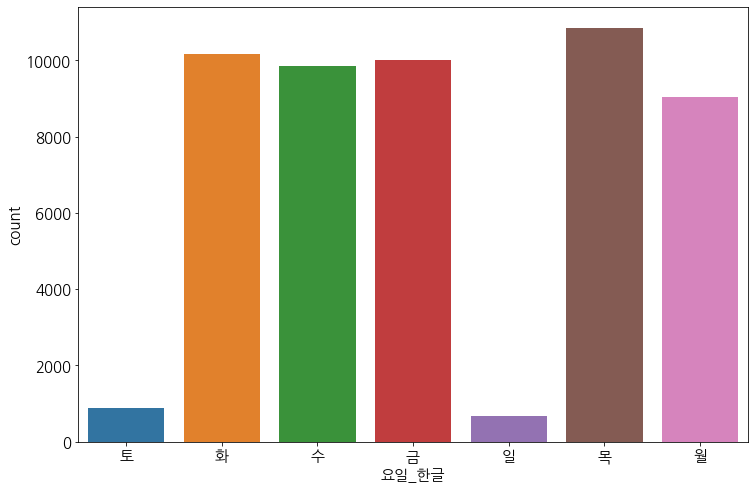

In [24]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rc('font', size=15)
sns.countplot(data=df, x='요일_한글')

<AxesSubplot:xlabel='요일_한글', ylabel='count'>

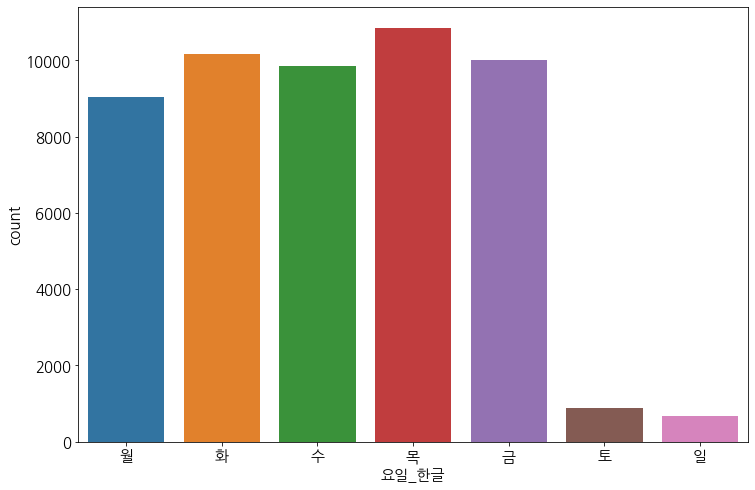

In [25]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rc('font', size=15)
sns.countplot(data=df.sort_values(by=['요일']), x='요일_한글')

<AxesSubplot:xlabel='연', ylabel='집행금액'>

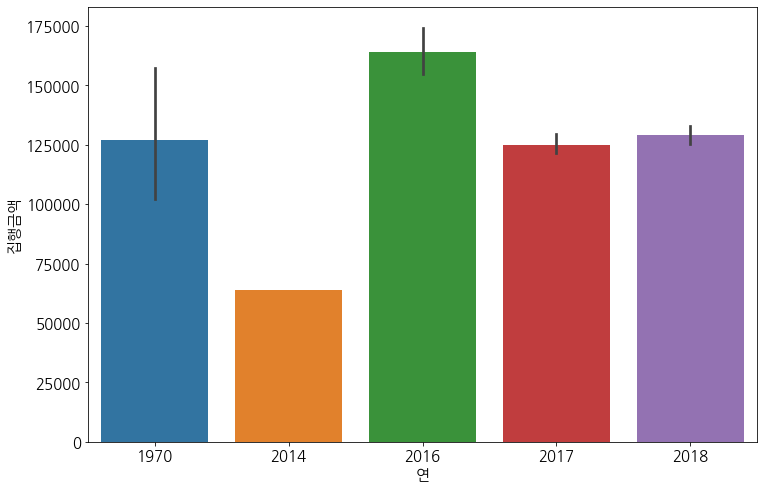

In [27]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rc('font', size=15)
sns.barplot(data=df, x='연', y='집행금액')

<AxesSubplot:xlabel='월', ylabel='집행금액'>

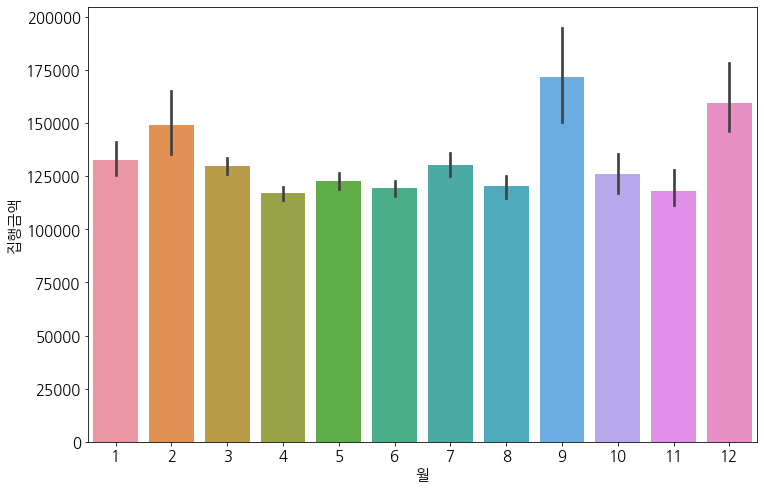

In [29]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rc('font', size=15)
sns.barplot(data=df, x='월', y='집행금액')

<AxesSubplot:xlabel='연월', ylabel='집행금액'>

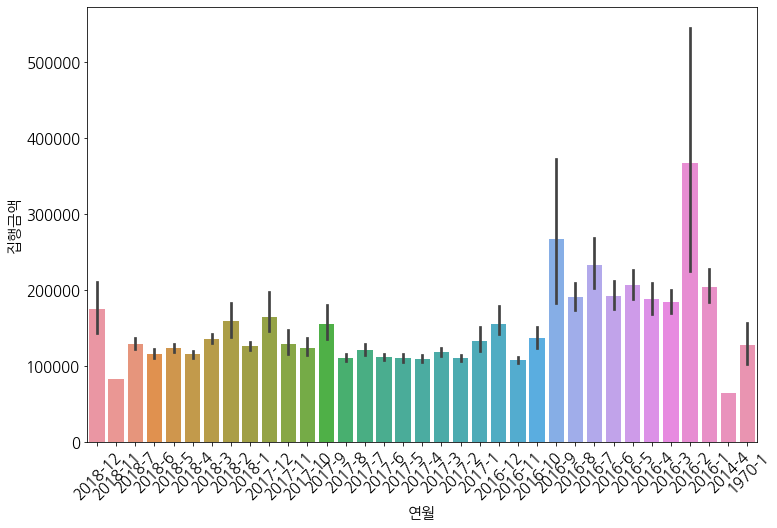

In [31]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rc('font', size=15)
plt.xticks(rotation=45)
sns.barplot(data=df, x='연월', y='집행금액')

<AxesSubplot:xlabel='시', ylabel='집행금액'>

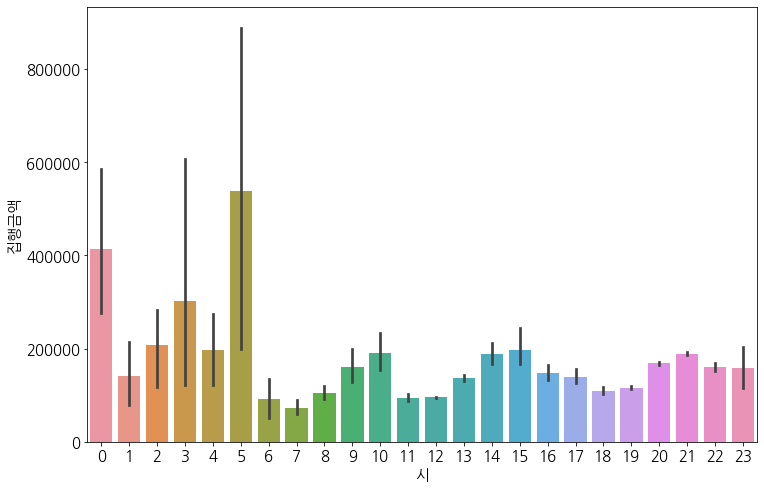

In [32]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rc('font', size=15)
sns.barplot(data=df, x='시', y='집행금액')

<AxesSubplot:xlabel='요일_한글', ylabel='집행금액'>

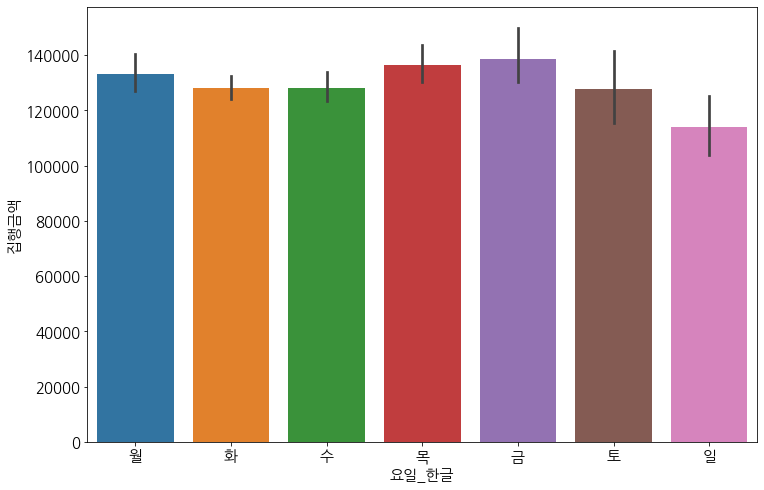

In [36]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rc('font', size=15)
sns.barplot(data=df.sort_values(by=['요일']), x='요일_한글', y='집행금액')

집행 목적 워드클라우드

In [37]:
from wordcloud import WordCloud

In [38]:
df.head()

,1소속부서,결제방법,구분,대상인원,부서명,집행금액,집행목적,집행일시,집행장소,연,월,연월,일,시,분,요일,요일_한글
연번,,,,,,,,,,,,,,,,,
1,시민건강국,카드,NaN,보건의료정책과장 등 8명,보건의료정책과,137600.0,겨울철 응급의료상황대비 업무추진관련 간담회비 지급,2018-12-01 12:27:00,FC외식(중구 태평로1가),2018,12,2018-12,1,12,27,5,토
2,시민건강국,카드,NaN,시민건강국장 등 3명,보건의료정책과,55000.0,시민건강국 현안업무 추진직원 격려 간담회비 지급,2018-12-04 20:23:00,대가일식(중구 서소문로101),2018,12,2018-12,4,20,23,1,화
3,시민건강국,카드,NaN,보건의료정책과장 등 6명,보건의료정책과,84000.0,시립병원장 회의추진관련 유관부서 간담회비 지급,2018-12-04 12:45:00,한가람(중구 을지로1가),2018,12,2018-12,4,12,45,1,화
4,시민건강국,카드,NaN,보건정책팀장 등 4명,보건의료정책과,40500.0,건강서울종합계획 수립관련 유관부서 간담회비 지급,2018-12-04 12:33:00,무교동낙지(중구 태평로2가),2018,12,2018-12,4,12,33,1,화
5,시민건강국,카드,NaN,보건정책팀장 등 3명,보건의료정책과,30000.0,예결위 예산심사관련 유관부서 간담회비 지급,2018-12-05 12:43:00,장호왕곱창(중구 서소문로83),2018,12,2018-12,5,12,43,2,수


In [42]:
# 집행목적이 NaN인 데이터를 확인한다
df[df['집행목적'].isnull()]

,1소속부서,결제방법,구분,대상인원,부서명,집행금액,집행목적,집행일시,집행장소,연,월,연월,일,시,분,요일,요일_한글
연번,,,,,,,,,,,,,,,,,
112,대변인,카드,NaN,행정팀장 등 4명,대변인 언론담당관,75000.0,NaN,2017-09-28 19:07:00,남산집 (중구 무교동),2017,9,2017-9,28,19,7,3,목
28,기획조정실,부서 법인카드,NaN,-,기획조정실 국제교류담당관,450000.0,NaN,2017-08-16 09:07:00,서울시청신매점,2017,8,2017-8,16,9,7,2,수
33,기획조정실,법인카드,NaN,-,기획조정실 국제교류담당관,450000.0,NaN,2017-07-21 16:01:00,서울시청매점,2017,7,2017-7,21,16,1,4,금
35,관광체육국,카드,NaN,관광체육국장 등 9명,관광체육국 관광정책과,175000.0,NaN,2017-03-28 20:26:00,신안촌 (서울 종로구 경희궁2길 14-4),2017,3,2017-3,28,20,26,1,화
1,여성가족정책실,카드,NaN,출산장려팀장외 4명,여성가족정책실 가족담당관,30000.0,NaN,2017-02-01 12:03:00,복성각 (서울 중구 덕수궁길 7),2017,2,2017-2,1,12,3,2,수
2,여성가족정책실,카드,NaN,가족정책팀장외 3명,여성가족정책실 가족담당관,21500.0,NaN,2017-02-01 15:30:00,마포만두 (서울 중구 남대문로9길 51),2017,2,2017-2,1,15,30,2,수
3,여성가족정책실,카드,NaN,가족담당관외 5명,여성가족정책실 가족담당관,56500.0,NaN,2017-02-10 09:48:00,파스쿠찌종각알파빌딩 (서울 종로구 종로),2017,2,2017-2,10,9,48,4,금
4,여성가족정책실,카드,NaN,가족담당관외 6명,여성가족정책실 가족담당관,8000.0,NaN,2017-02-10 09:54:00,파리바게뜨 종로시그 (서울 종로구 종로),2017,2,2017-2,10,9,54,4,금
5,여성가족정책실,카드,NaN,가족담당관외 8명,여성가족정책실 가족담당관,117000.0,NaN,2017-02-10 12:14:00,（주）뚜리삼 (서울 중구 무교동),2017,2,2017-2,10,12,14,4,금


In [43]:
# 집행목적이 NaN인 데이터가 존재하므로 NaN을 공백으로 채워준다
df['집행목적'] = df['집행목적'].fillna(' ')
df[df['집행목적'].isnull()]

,1소속부서,결제방법,구분,대상인원,부서명,집행금액,집행목적,집행일시,집행장소,연,월,연월,일,시,분,요일,요일_한글
연번,,,,,,,,,,,,,,,,,


In [45]:
# 파이썬 문자열 메소드 중 특정 문자열을 문자열 사이에 삽입하는 join() 함수로 집행목적을 연결해 워드클라우드를 실행한다
spend_gubun = ' '.join(df['집행목적'])
spend_gubun[:100]

'겨울철 응급의료상황대비 업무추진관련 간담회비 지급 시민건강국 현안업무 추진직원 격려 간담회비 지급 시립병원장 회의추진관련 유관부서 간담회비 지급 건강서울종합계획 수립관련 유관부서 '

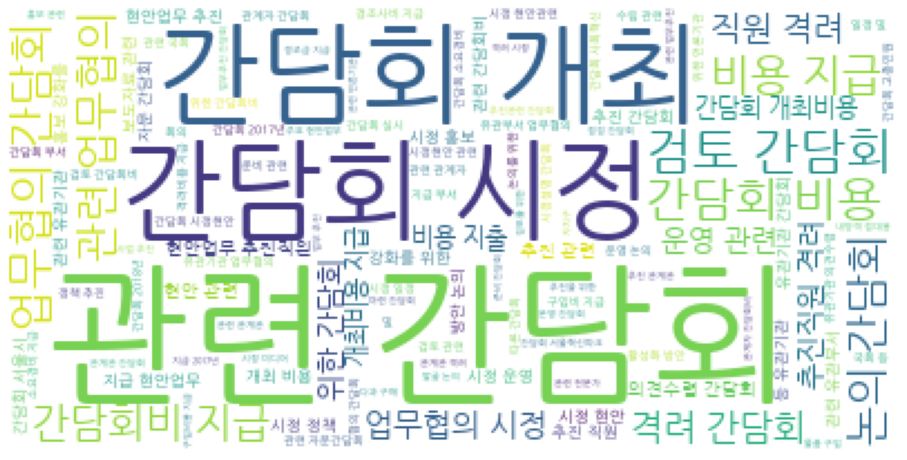

In [52]:
wordcloud = WordCloud(
    font_path='C:\\Windows\\Fonts\\\x7f\x7f\x7f\x7f.TTF',
    background_color='white',
    relative_scaling=0.5
).generate(spend_gubun)
plt.figure(figsize=(16, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [53]:
# 집행자소가 NaN인 데이터를 확인한다
df[df['집행장소'].isnull()]

,1소속부서,결제방법,구분,대상인원,부서명,집행금액,집행목적,집행일시,집행장소,연,월,연월,일,시,분,요일,요일_한글
연번,,,,,,,,,,,,,,,,,
3,행정2부시장,현금,NaN,행정2부시장,행정2부시장,50000.0,도시기반시설본부직원 경조사비 지급,2016-04-02,NaN,2016,4,2016-4,2,0,0,5,토
4,행정2부시장,현금,NaN,행정2부시장,행정2부시장,50000.0,주택건축국직원경조사비 지급,2016-04-03,NaN,2016,4,2016-4,3,0,0,6,일
18,행정2부시장,현금,NaN,행정2부시장,행정2부시장,50000.0,도시기반시설본부직원 경조사비 지급,2016-04-09,NaN,2016,4,2016-4,9,0,0,5,토
53,행정2부시장,현금,NaN,행정2부시장,행정2부시장,50000.0,상수도사업본부직원경조사비 지급,2016-04-28,NaN,2016,4,2016-4,28,0,0,3,목
56,행정2부시장,현금,NaN,행정2부시장,행정2부시장,50000.0,품질시험소직원경조사비 지급,2016-04-30,NaN,2016,4,2016-4,30,0,0,5,토
4,행정2부시장,현금,NaN,행정2부시장,행정2부시장,50000.0,물순환안전국직원경조사비 지급,2016-03-02,NaN,2016,3,2016-3,2,0,0,2,수
5,행정2부시장,현금,NaN,행정2부시장,행정2부시장,50000.0,도시재생본부직원경조사비 지급,2016-03-02,NaN,2016,3,2016-3,2,0,0,2,수
11,행정2부시장,현금,NaN,행정2부시장,행정2부시장,50000.0,성동구도시관리국직원 경조사비 지급,2016-03-06,NaN,2016,3,2016-3,6,0,0,6,일
24,행정2부시장,현금,NaN,행정2부시장,행정2부시장,50000.0,시의회상임위의원경조사비 지급,2016-03-11,NaN,2016,3,2016-3,11,0,0,4,금


In [54]:
df['집행장소'] = df['집행장소'].fillna(' ')
df[df['집행장소'].isnull()]

,1소속부서,결제방법,구분,대상인원,부서명,집행금액,집행목적,집행일시,집행장소,연,월,연월,일,시,분,요일,요일_한글
연번,,,,,,,,,,,,,,,,,


In [55]:
df.head()

,1소속부서,결제방법,구분,대상인원,부서명,집행금액,집행목적,집행일시,집행장소,연,월,연월,일,시,분,요일,요일_한글
연번,,,,,,,,,,,,,,,,,
1,시민건강국,카드,NaN,보건의료정책과장 등 8명,보건의료정책과,137600.0,겨울철 응급의료상황대비 업무추진관련 간담회비 지급,2018-12-01 12:27:00,FC외식(중구 태평로1가),2018,12,2018-12,1,12,27,5,토
2,시민건강국,카드,NaN,시민건강국장 등 3명,보건의료정책과,55000.0,시민건강국 현안업무 추진직원 격려 간담회비 지급,2018-12-04 20:23:00,대가일식(중구 서소문로101),2018,12,2018-12,4,20,23,1,화
3,시민건강국,카드,NaN,보건의료정책과장 등 6명,보건의료정책과,84000.0,시립병원장 회의추진관련 유관부서 간담회비 지급,2018-12-04 12:45:00,한가람(중구 을지로1가),2018,12,2018-12,4,12,45,1,화
4,시민건강국,카드,NaN,보건정책팀장 등 4명,보건의료정책과,40500.0,건강서울종합계획 수립관련 유관부서 간담회비 지급,2018-12-04 12:33:00,무교동낙지(중구 태평로2가),2018,12,2018-12,4,12,33,1,화
5,시민건강국,카드,NaN,보건정책팀장 등 3명,보건의료정책과,30000.0,예결위 예산심사관련 유관부서 간담회비 지급,2018-12-05 12:43:00,장호왕곱창(중구 서소문로83),2018,12,2018-12,5,12,43,2,수


In [61]:
# 집행장소에 주소가 많이 보이기 때문에 주소는 전처리를 통해 제거하고 '상호명'이라는 열을 만들어 집행장소에서 상호명을 가져온다
# 상호명이 여는 괄호 앞쪽에 있으므로 여는 괄호 앞에 있는 것을 상호명으로 한다
df['상호명'] = df['집행장소'].apply(lambda x: x.split('(')[0].split())
df

,1소속부서,결제방법,구분,대상인원,부서명,집행금액,집행목적,집행일시,집행장소,연,월,연월,일,시,분,요일,요일_한글,상호명
연번,,,,,,,,,,,,,,,,,,
1,시민건강국,카드,NaN,보건의료정책과장 등 8명,보건의료정책과,137600.0,겨울철 응급의료상황대비 업무추진관련 간담회비 지급,2018-12-01 12:27:00,FC외식(중구 태평로1가),2018,12,2018-12,1,12,27,5,토,[FC외식]
2,시민건강국,카드,NaN,시민건강국장 등 3명,보건의료정책과,55000.0,시민건강국 현안업무 추진직원 격려 간담회비 지급,2018-12-04 20:23:00,대가일식(중구 서소문로101),2018,12,2018-12,4,20,23,1,화,[대가일식]
3,시민건강국,카드,NaN,보건의료정책과장 등 6명,보건의료정책과,84000.0,시립병원장 회의추진관련 유관부서 간담회비 지급,2018-12-04 12:45:00,한가람(중구 을지로1가),2018,12,2018-12,4,12,45,1,화,[한가람]
4,시민건강국,카드,NaN,보건정책팀장 등 4명,보건의료정책과,40500.0,건강서울종합계획 수립관련 유관부서 간담회비 지급,2018-12-04 12:33:00,무교동낙지(중구 태평로2가),2018,12,2018-12,4,12,33,1,화,[무교동낙지]
5,시민건강국,카드,NaN,보건정책팀장 등 3명,보건의료정책과,30000.0,예결위 예산심사관련 유관부서 간담회비 지급,2018-12-05 12:43:00,장호왕곱창(중구 서소문로83),2018,12,2018-12,5,12,43,2,수,[장호왕곱창]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,행정국,카드,NaN,전직원,일력개발과,66000.0,2016 인력개발과 종무식 다과비 지급,1970-01-01 09:00:00,서울시청매점 (중구 서소문동),1970,1,1970-1,1,9,0,3,목,[서울시청매점]
33,행정국,카드,NaN,전직원,일력개발과,66000.0,인력개발과 종무식 다과비 지급,1970-01-01 09:00:00,서울시청신매점 (중구 세종대로),1970,1,1970-1,1,9,0,3,목,[서울시청신매점]
28,행정국,카드,NaN,의전팀장 등 3명,행정국 총무과,39000.0,대한노인회 서울시연합회 정기총회 의전지원 업무협의,1970-01-01 09:00:00,먹는세상 (용산구 효창원로),1970,1,1970-1,1,9,0,3,목,[먹는세상]


In [62]:
# 집행장소에 주소가 많이 보이기 때문에 주소는 전처리를 통해 제거하고 '상호명'이라는 열을 만들어 집행장소에서 상호명을 가져온다
# 상호명이 여는 괄호 앞쪽에 있으므로 여는 괄호 앞에 있는 것을 상호명으로 한다
df['상호명'] = df['집행장소'].apply(lambda x: x.split('(')[0].strip())
df

,1소속부서,결제방법,구분,대상인원,부서명,집행금액,집행목적,집행일시,집행장소,연,월,연월,일,시,분,요일,요일_한글,상호명
연번,,,,,,,,,,,,,,,,,,
1,시민건강국,카드,NaN,보건의료정책과장 등 8명,보건의료정책과,137600.0,겨울철 응급의료상황대비 업무추진관련 간담회비 지급,2018-12-01 12:27:00,FC외식(중구 태평로1가),2018,12,2018-12,1,12,27,5,토,FC외식
2,시민건강국,카드,NaN,시민건강국장 등 3명,보건의료정책과,55000.0,시민건강국 현안업무 추진직원 격려 간담회비 지급,2018-12-04 20:23:00,대가일식(중구 서소문로101),2018,12,2018-12,4,20,23,1,화,대가일식
3,시민건강국,카드,NaN,보건의료정책과장 등 6명,보건의료정책과,84000.0,시립병원장 회의추진관련 유관부서 간담회비 지급,2018-12-04 12:45:00,한가람(중구 을지로1가),2018,12,2018-12,4,12,45,1,화,한가람
4,시민건강국,카드,NaN,보건정책팀장 등 4명,보건의료정책과,40500.0,건강서울종합계획 수립관련 유관부서 간담회비 지급,2018-12-04 12:33:00,무교동낙지(중구 태평로2가),2018,12,2018-12,4,12,33,1,화,무교동낙지
5,시민건강국,카드,NaN,보건정책팀장 등 3명,보건의료정책과,30000.0,예결위 예산심사관련 유관부서 간담회비 지급,2018-12-05 12:43:00,장호왕곱창(중구 서소문로83),2018,12,2018-12,5,12,43,2,수,장호왕곱창
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,행정국,카드,NaN,전직원,일력개발과,66000.0,2016 인력개발과 종무식 다과비 지급,1970-01-01 09:00:00,서울시청매점 (중구 서소문동),1970,1,1970-1,1,9,0,3,목,서울시청매점
33,행정국,카드,NaN,전직원,일력개발과,66000.0,인력개발과 종무식 다과비 지급,1970-01-01 09:00:00,서울시청신매점 (중구 세종대로),1970,1,1970-1,1,9,0,3,목,서울시청신매점
28,행정국,카드,NaN,의전팀장 등 3명,행정국 총무과,39000.0,대한노인회 서울시연합회 정기총회 의전지원 업무협의,1970-01-01 09:00:00,먹는세상 (용산구 효창원로),1970,1,1970-1,1,9,0,3,목,먹는세상


In [64]:
# 상호명이 공백인 데이터의 집행목적을 확인한다
df.loc[df['상호명'] == '', '집행목적'].value_counts().head()

현안업무 추진직원 격려 간담회 개최비용 지급     7
상수도사업본부직원경조사비 지급             4
부서운영을 위한 원두커피 구입비 지급         3
도시기반시설본부직원 경조사비 지급           3
2018년도 5~7월 생일직원 문화상품권 지급    2
Name: 집행목적, dtype: int64

In [68]:
# 상호명이 '대상자 소속부서'인 데이터의 집행목적을 확인한다
df.loc[df['상호명'] == '대상자 소속부서', '집행목적'].value_counts().head()

경조금 지급       126
경조금 지급 2건     14
경조금 지급 3건     11
경조금 2건         9
경조금 지급 5건      6
Name: 집행목적, dtype: int64

In [69]:
# 상호명아 '-'인 데이터의 집행목적을 확인한다
df.loc[df['상호명'] == '-', '집행목적'].value_counts().head()

소속 상근직원 경조사비 지급    82
소속직원 경조사비 지급       33
축.부의금 지급           31
소속직원 경조사비 지출       20
축의금 지급             19
Name: 집행목적, dtype: int64

In [73]:
# 상호명이 공백, '대상자 소속부서', '-'인 데이터(잘못된 데이터)를 제거한다
df_shop = df[(df['상호명'] != ' ') & (df['상호명'] != '대상자 소속부서') & (df['상호명'] != '-')]
df_shop.head()

,1소속부서,결제방법,구분,대상인원,부서명,집행금액,집행목적,집행일시,집행장소,연,월,연월,일,시,분,요일,요일_한글,상호명
연번,,,,,,,,,,,,,,,,,,
1,시민건강국,카드,NaN,보건의료정책과장 등 8명,보건의료정책과,137600.0,겨울철 응급의료상황대비 업무추진관련 간담회비 지급,2018-12-01 12:27:00,FC외식(중구 태평로1가),2018,12,2018-12,1,12,27,5,토,FC외식
2,시민건강국,카드,NaN,시민건강국장 등 3명,보건의료정책과,55000.0,시민건강국 현안업무 추진직원 격려 간담회비 지급,2018-12-04 20:23:00,대가일식(중구 서소문로101),2018,12,2018-12,4,20,23,1,화,대가일식
3,시민건강국,카드,NaN,보건의료정책과장 등 6명,보건의료정책과,84000.0,시립병원장 회의추진관련 유관부서 간담회비 지급,2018-12-04 12:45:00,한가람(중구 을지로1가),2018,12,2018-12,4,12,45,1,화,한가람
4,시민건강국,카드,NaN,보건정책팀장 등 4명,보건의료정책과,40500.0,건강서울종합계획 수립관련 유관부서 간담회비 지급,2018-12-04 12:33:00,무교동낙지(중구 태평로2가),2018,12,2018-12,4,12,33,1,화,무교동낙지
5,시민건강국,카드,NaN,보건정책팀장 등 3명,보건의료정책과,30000.0,예결위 예산심사관련 유관부서 간담회비 지급,2018-12-05 12:43:00,장호왕곱창(중구 서소문로83),2018,12,2018-12,5,12,43,2,수,장호왕곱창


In [77]:
df_shop['상호명'].value_counts().head(30)

참숯골           773
우도일식          729
서울시청매점        700
구이구이          647
곰국시집          494
서울시청구내식당      409
동해일식          399
무교소호정         362
동해수산          331
바닷가작은부엌       319
스타벅스          319
라칸티나          309
한가람           308
동원참치          304
더테이블한정식       295
              291
삼우정           278
어미가           276
제일가든          274
파리바게뜨         259
오리마당          259
복성각           256
월향            256
열빈            230
무교동낙지         229
남포면옥          223
（주）바닷가작은부엌    217
서라벌           205
포메인           205
마마스           202
Name: 상호명, dtype: int64

In [79]:
df_shop.loc[df_shop['상호명'] == ' (주) 바닷가작은부엌', '상호명'] = '바닷가작은부엌'
df_shop['상호명'].value_counts().head(30)

참숯골           773
우도일식          729
서울시청매점        700
구이구이          647
곰국시집          494
서울시청구내식당      409
동해일식          399
무교소호정         362
동해수산          331
바닷가작은부엌       319
스타벅스          319
라칸티나          309
한가람           308
동원참치          304
더테이블한정식       295
              291
삼우정           278
어미가           276
제일가든          274
파리바게뜨         259
오리마당          259
복성각           256
월향            256
열빈            230
무교동낙지         229
남포면옥          223
（주）바닷가작은부엌    217
서라벌           205
포메인           205
마마스           202
Name: 상호명, dtype: int64

In [82]:
top_100 = df_shop['상호명'].value_counts().head(100)
top_100 = pd.DataFrame(top_100).reset_index()
top_100.columns = ['상호명', '방문횟수']
top_100

,상호명,방문횟수
0,참숯골,773
1,우도일식,729
2,서울시청매점,700
3,구이구이,647
4,곰국시집,494
...,...,...
95,잼배옥,85
96,부민옥,84
97,장안삼계탕,84
98,프레스클럽,84


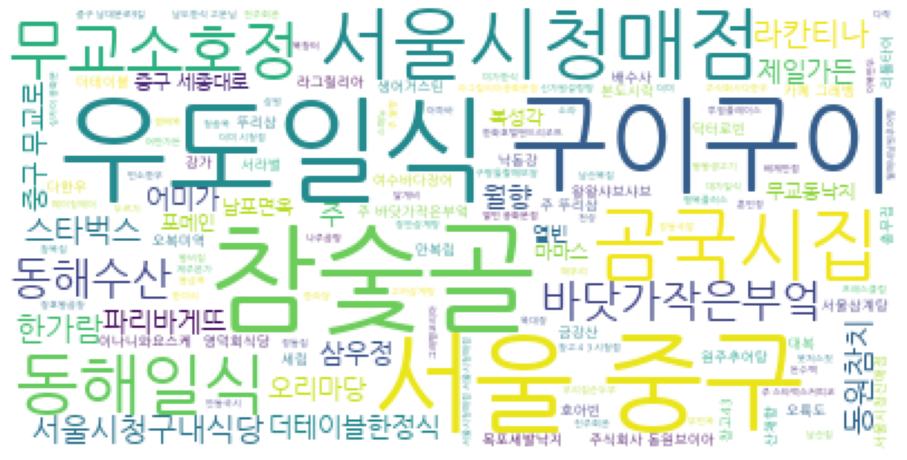

In [83]:
wordcloud = WordCloud(
    font_path='C:\\Windows\\Fonts\\\x7f\x7f\x7f\x7f.TTF',
    background_color='white',
    relative_scaling=0.5
).generate(' '.join(df_shop['상호명']))
plt.figure(figsize=(16, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()